# Random exchange economic model prototype

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gini(x):
    n = len(x)
    return 1-2/(n-1)*(n-np.dot(np.arange(1,n+1),sorted(x))/(np.sum(x)))

print('Equality, should be 0:',gini([1]*100))
print('Extreme oligarphy, should be 1:',gini([100]+[0]*99))
print('Linear, should be ~1/3:',gini(np.arange(100)))

Equality, should be 0: 0.0
Extreme oligarphy, should be 1: 1.0
Linear, should be ~1/3: 0.34006734006733996


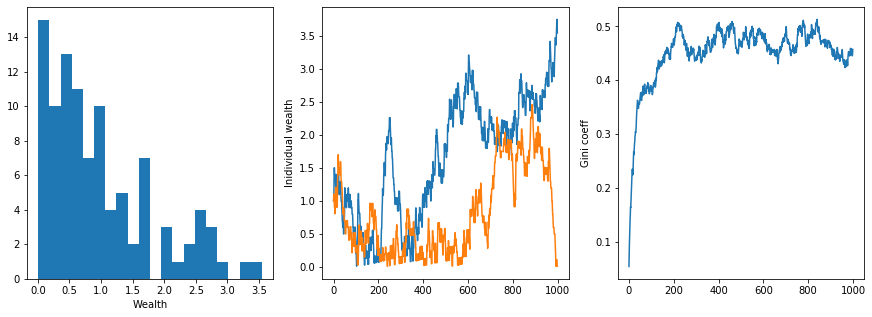

In [4]:
n_elements = 100
n_steps = 1000
amount = 0.1
approach = 'fixed' # Either 'fixed' or 'share'
growth = 0.000 # Market growth at each time cycle
tax = 0.001

def model():
    wealth = np.ones(n_elements) # Original wealth
    history = np.zeros(shape=(n_steps,n_elements))
    ghist = np.zeros(n_steps)
    for t in range(n_steps):
        for i in range(n_elements):
            j = np.random.randint(n_elements)
            if approach=='fixed':
                if wealth[i] >= amount:
                    wealth[i] -= amount
                    wealth[j] += amount
            elif approach=='share':
                temp = np.min([wealth[i], (wealth[i]+wealth[j])/2*amount])
                wealth[i] -= temp
                wealth[j] += temp
        wealth = wealth*(1 + growth)*(1-tax) + tax*np.mean(wealth)
        history[t,:] = wealth
    return history


# Run model
history = model()
ghist = [gini(history[i,:]) for i in range(history.shape[0])]

# Figures
fig = plt.figure(figsize=(15,5))
plt.subplot(131);
plt.hist(history[-1,:], bins=20);
plt.xlabel('Wealth');

plt.subplot(132);
imax = np.argmax(history[-1,:])
imin = np.argmin(history[-1,:])
plt.plot(history[:,imax]);
plt.plot(history[:,imin]);
plt.ylabel('Inidividual wealth');

plt.subplot(133);
plt.plot(ghist);
plt.ylabel('Gini index');

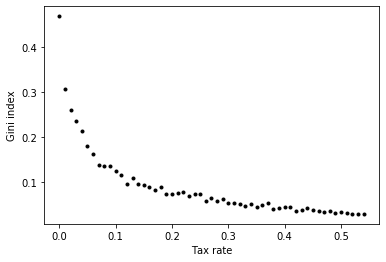

In [7]:
for tax in np.arange(0,0.51,0.01):
    history = model()
    plt.plot(tax,gini(history[-1,:]),'k.')
plt.xlabel('Tax rate');
plt.ylabel('Gini index');